<a href="https://colab.research.google.com/github/diontajones/Flying-Etiquette-Survey/blob/main/Flying_Etiquette_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import squarify
import plotly.express as px
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
description = df.describe()
print(description)

In [ ]:
age_counts = df['Age'].value_counts()
age_percentages = (age_counts / df['Age'].count()) * 100
age_percentages = age_percentages.sort_values()
# print(age_counts)
# print(age_percentages)
plt.bar(age_percentages.index, age_percentages)
plt.title('Percentage of Age Ranges in Survey')
plt.xlabel('Age Ranges')
plt.ylabel('Percentage')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

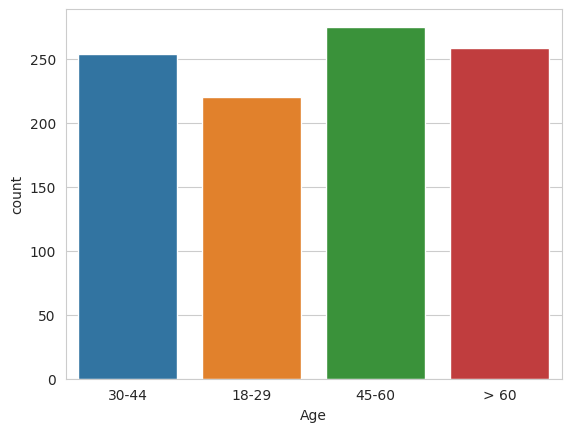

In [ ]:
sns.countplot(x='Age',data=df)

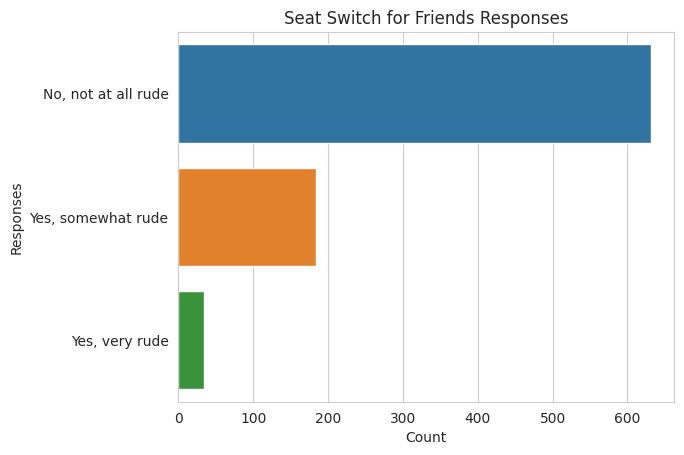

In [ ]:
# seat_switch = df.iloc[:, 14].value_counts()
seat_switch = df.loc[:, df.columns[14]].value_counts()
sns.barplot(x=seat_switch.values, y=seat_switch.index)
plt.xlabel('Count')
plt.ylabel('Responses')
plt.title('Seat Switch for Friends Responses')
plt.show()


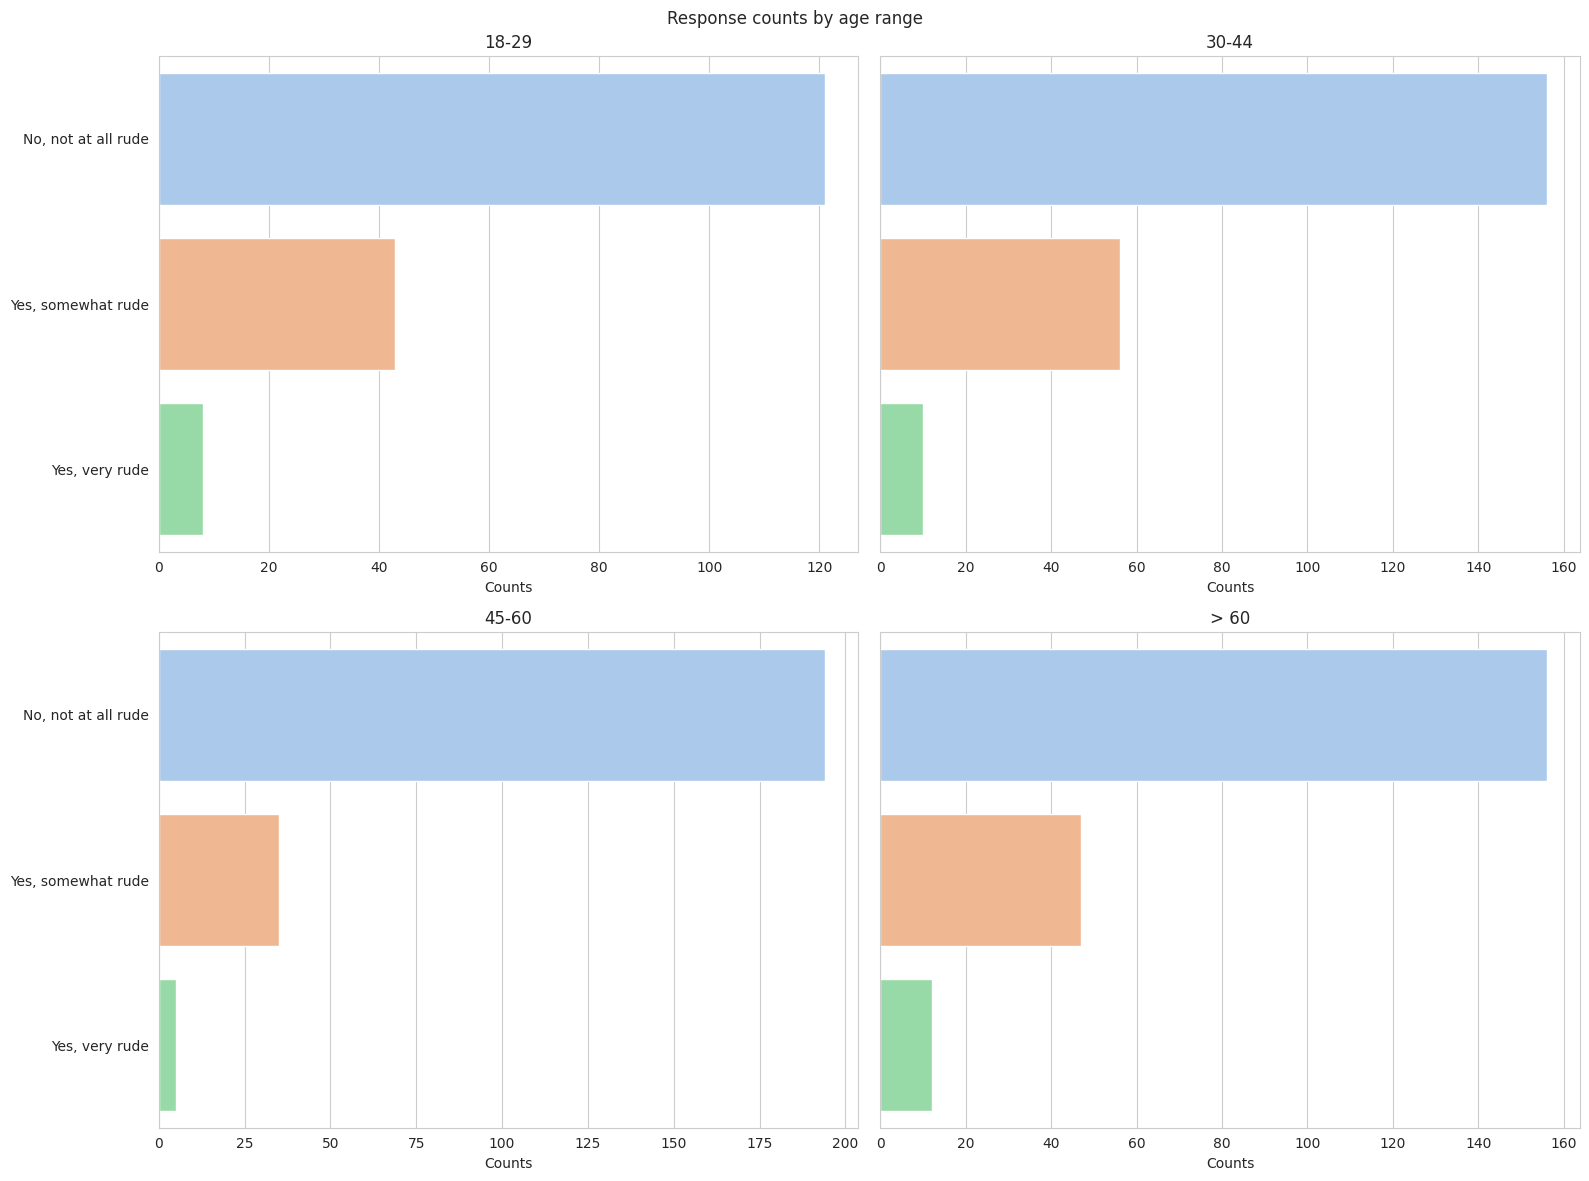

In [ ]:
age_range_one = '18-29'
response_one = df.loc[df['Age'] == age_range_one, df.columns[14]].value_counts()

age_range_two = '30-44'
response_two = df.loc[df['Age'] == age_range_two, df.columns[14]].value_counts()

age_range_three = '45-60'
response_three = df.loc[df['Age'] == age_range_three, df.columns[14]].value_counts()

age_range_four = '> 60'
response_four = df.loc[df['Age'] == age_range_four, df.columns[14]].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.set_style('dark')
colors = sns.color_palette('pastel')

sns.barplot(x=response_one.values, y=response_one.index, ax=axs[0, 0], palette=colors)
axs[0, 0].set_title(age_range_one)
axs[0, 0].set_xlabel('Counts')


sns.barplot(x=response_two.values, y=response_two.index, ax=axs[0, 1], palette=colors)
axs[0, 1].set_title(age_range_two)
axs[0, 1].set_xlabel('Counts')
axs[0, 1].set_ylabel('')
axs[0, 1].set_yticklabels([])

sns.barplot(x=response_three.values, y=response_three.index, ax=axs[1, 0], palette=colors)
axs[1, 0].set_title(age_range_three)
axs[1, 0].set_xlabel('Counts')


sns.barplot(x=response_four.values, y=response_four.index, ax=axs[1, 1], palette=colors)
axs[1, 1].set_title(age_range_four)
axs[1, 1].set_xlabel('Counts')
axs[1, 1].set_ylabel('')
axs[1, 1].set_yticklabels([])

fig.suptitle('Response counts by age range')
plt.tight_layout()

plt.show()

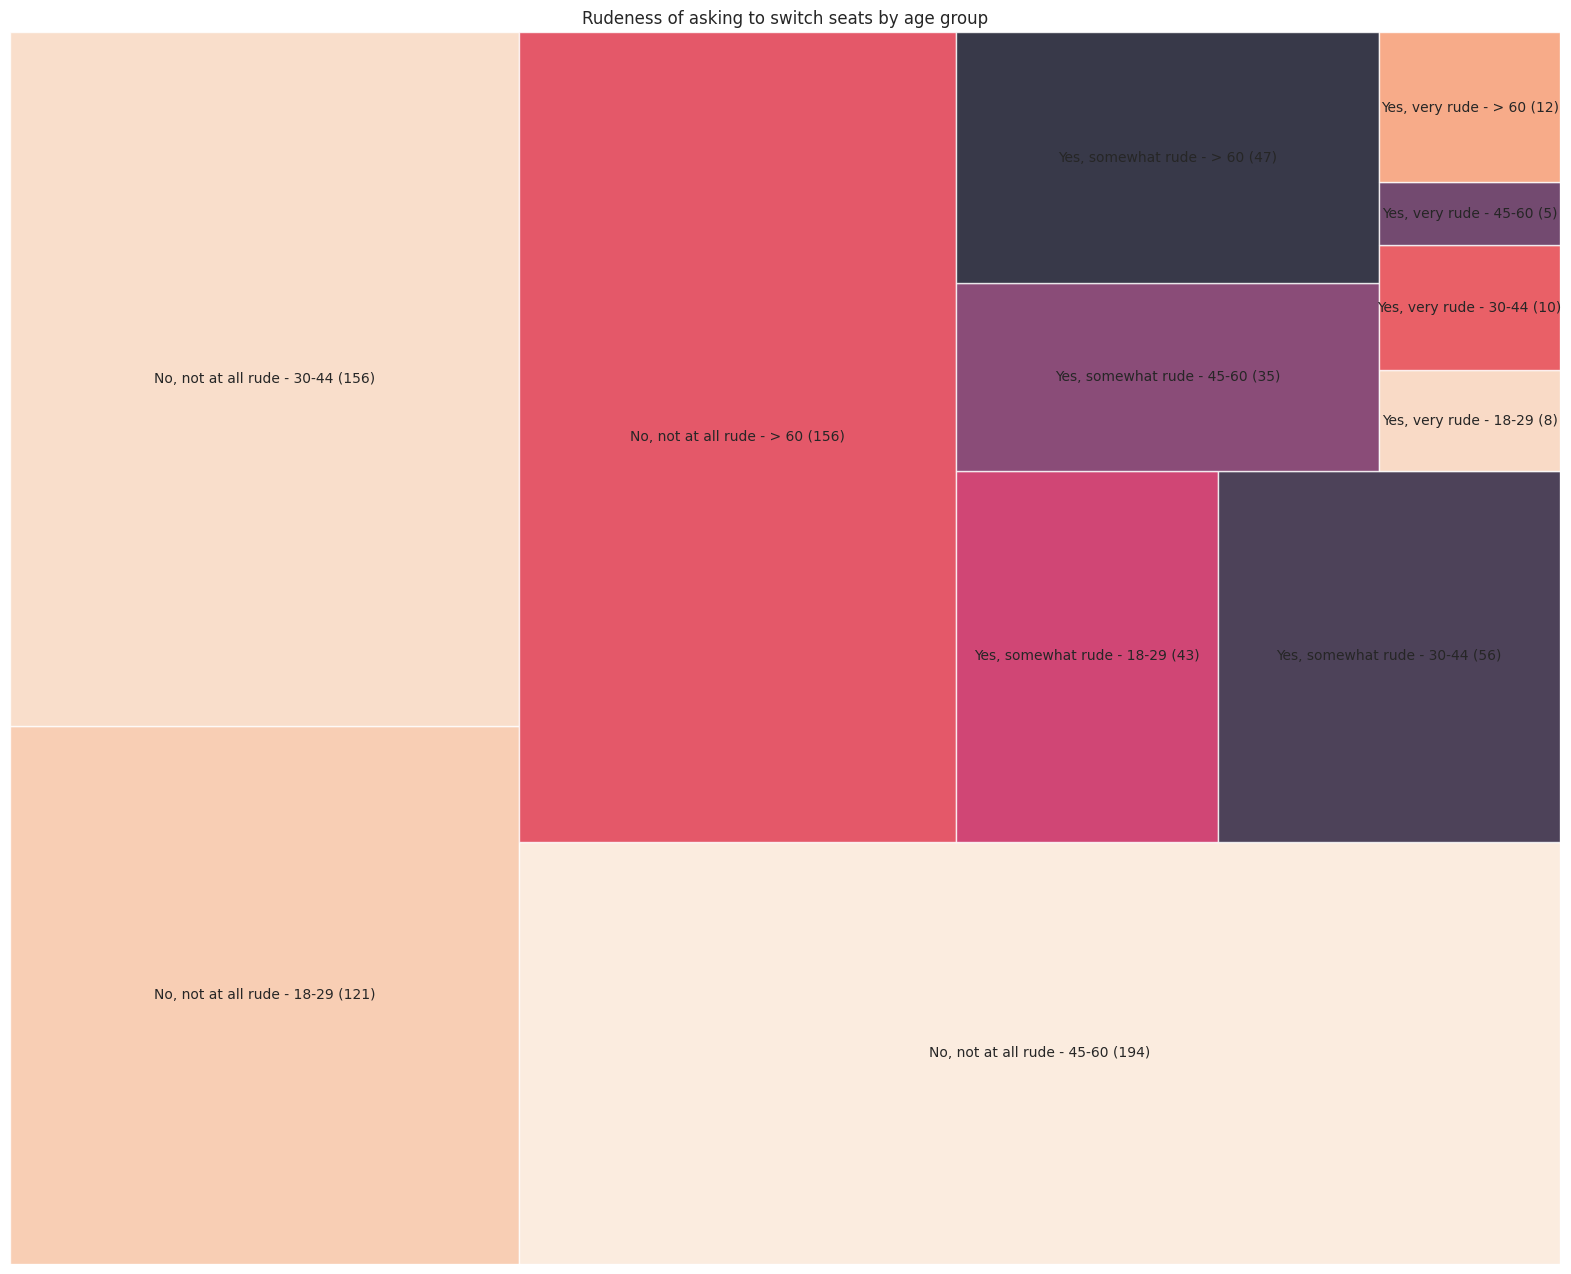

In [ ]:
# Group the data by the two columns
grouped = df.groupby(['Is it rude to ask someone to switch seats with you in order to be closer to friends?', 'Age']).size().reset_index(name='Count')

# Create the labels for the treemap
labels = [f"{group[0]} - {group[1]} ({count})" for group, count in zip(grouped[['Is it rude to ask someone to switch seats with you in order to be closer to friends?', 'Age']].values, grouped['Count'].values)]
'''
The variable labels in this code is a list of strings that are used as labels for 
each rectangular section in the treemap. Each label contains information about the 
corresponding group of data, such as the response to the question "Is it rude to ask 
someone to switch seats with you in order to be closer to friends?" and the age group.
'''

'''
The labels list is created using a list comprehension that iterates over each group of 
data in the grouped DataFrame, and uses string formatting to create a label string for 
each group. The label string is constructed by concatenating the values of the "Is it 
rude to ask someone to switch seats with you in order to be closer to friends?" and "Age" 
columns, along with the count of responses for that group, in the following format: 
"{Is it rude to ask someone to switch seats with you in order to be closer to friends?} - {Age} ({Count})".
'''


# Create the values for the treemap
values = grouped['Count'].values

# Set the figure size
plt.figure(figsize=(20, 16))

# Create the treemap using squarify
squarify.plot(sizes=values, label=labels, alpha=.8 )

# Add a title
plt.title('Rudeness of asking to switch seats by age group')

# Remove axis labels and ticks
plt.axis('off')

# Show the treemap
plt.show()


In [ ]:
# seat_switch = df.iloc[:, 14].value_counts()
# print(seat_switch)
# switch_by_age = df.groupby(['Age', df.columns[14]])  
# switch_by_ages = df.groupby(['Age', df.columns[14]]).size()
# print(type(switch_by_age))
# print(switch_by_ages)
# print(switch_by_ages)
# x_x = switch_by_ages.values
# y_y = switch_by_ages.index
# plt.figure(figsize=(15, 15))
# plt.bar(x_x, y_y)
# switch_by_age = switch_by_age.unstack()
# switch_by_age.plot(kind='bar', subplots=True, layout=(2,2), figsize=(10,10))
# plt.show()
# switch_age = df.groupby('Age').agg({df.columns[14]: ['count', 'sum']})
# print(switch_age)



In [ ]:
# age_range_one = '18-29'
# response_one = df.loc[df['Age'] == age_range_one, df.columns[14]].value_counts()

# age_range_two = '30-44'
# response_two = df.loc[df['Age'] == age_range_two, df.columns[14]].value_counts()

# age_range_three = '45-60'
# response_three = df.loc[df['Age'] == age_range_three, df.columns[14]].value_counts()

# age_range_four = '> 60'
# response_four = df.loc[df['Age'] == age_range_four, df.columns[14]].value_counts()

# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# axs[0, 0].barh(response_one.index, response_one.values)

# axs[0, 1].barh(response_two.index, response_two.values)

# axs[1, 0].barh(response_three.index, response_three.values)

# axs[1, 1].barh(response_four.index, response_four.values)

# plt.show()